In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Simple Neural Network with PyTorch: Iris Dataset

This notebook demonstrates how to build, train, evaluate, and save a simple neural network for classifying iris flowers using PyTorch. You'll learn about data preprocessing, model definition, training loops, evaluation, and model persistence.

In [2]:
# Create a Model class that inherits from nn.Module
class Model(nn.Module):
    # Input layer (4 features of the iris dataset) -> 
    # Hidden layer1 (10 neurons) ->
    # Hidden layer2 (5 neurons) -> 
    # Output layer (3 classes)
    def __init__(self, input_size=4, hidden_size1=10, hidden_size2=5, output_size=3):
        super(Model, self).__init__() # Initialize the parent class

        # Define the layers of the neural network

        # Input layer to first hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size1)

        # First hidden layer to second hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)

        # Second hidden layer to output layer
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Apply ReLU activation function to the first hidden layer
        x = F.relu(self.fc1(x))

        # Apply ReLU activation function to the second hidden layer
        x = F.relu(self.fc2(x))
        
        # Output layer (no activation function applied)
        x = self.output(x)

        return x

## Model Architecture

We define a simple feedforward neural network with two hidden layers using PyTorch's `nn.Module`. The model takes 4 input features and outputs probabilities for 3 classes.

In [71]:
# Pick a random seed for reproducibility
torch.manual_seed(42)
# Create an instance of the Model
model = Model()

In [101]:
# Print model summary
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
)


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# This line is used to display plots inline in Jupyter notebooks
%matplotlib inline 

## About the Iris Dataset

The Iris dataset is a classic dataset in machine learning, containing 150 samples of iris flowers with four features each:
- sepal length
- sepal width
- petal length
- petal width

There are three classes (species):
- 0: Setosa
- 1: Versicolor
- 2: Virginica

In [73]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [74]:
df.head()  # Display the first few rows of the DataFrame

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Data Preprocessing

We load the dataset, convert class labels to integers, and split the data into training and test sets. Features are converted to float tensors and labels to long tensors for PyTorch compatibility.

In [75]:
# Change last column from string to int
df['variety'] = df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
df

/var/folders/96/6g3fwyp57zzcf7yjss5mn5b40000gn/T/ipykernel_39317/968843418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [102]:
# Show class distribution and feature statistics
display(df['variety'].value_counts())
display(df.describe())

variety
0    50
1    50
2    50
Name: count, dtype: int64

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [76]:
# Train Test Split: Set X and y
X = df.drop('variety', axis=1) # Features (all columns except 'variety')
y = df['variety'] # Target variable (the 'variety' column)

In [77]:
# Convert these to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Train Test Split: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [81]:
# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [82]:
# Set the criterion of the model to measure the error, how far off the predictions are
criterion = nn.CrossEntropyLoss()

# Choose an optimizer to update the weights of the model
# (If error doesnt go down after a bunch of interations i.e. epochs, try changing the learning rate lower)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Training the Model

We train the model using cross-entropy loss and the Adam optimizer. The training loop updates the model's weights to minimize the loss.

In [83]:
# Train the model
num_epochs = 100  # Number of epochs to train the model (epoch is one full pass through the dataset)
losses = []  # List to store loss values for each epoch

# Loop through the number of epochs
for epoch in range(num_epochs):

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model.forward(X_train)

    # Compute the loss
    loss = criterion(y_pred, y_train) # Calculate the error between predicted and actual labels

    # Keep track of the loss value
    losses.append(loss.detach().numpy())  # Detach the loss from the computation graph and convert to numpy

    # Print the loss every 100 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Back propagation: Compute gradients of the loss with respect to model parameters
    # Take the error rate of forward pass and calculate the gradients
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    loss.backward()  # Backward pass: Compute gradients
    optimizer.step()  # Update the model parameters using the optimizer

Epoch [10/100], Loss: 1.0494
Epoch [20/100], Loss: 0.9202
Epoch [30/100], Loss: 0.7714
Epoch [40/100], Loss: 0.6877
Epoch [50/100], Loss: 0.6284
Epoch [60/100], Loss: 0.5507
Epoch [70/100], Loss: 0.4316
Epoch [80/100], Loss: 0.2922
Epoch [90/100], Loss: 0.2027
Epoch [100/100], Loss: 0.1627


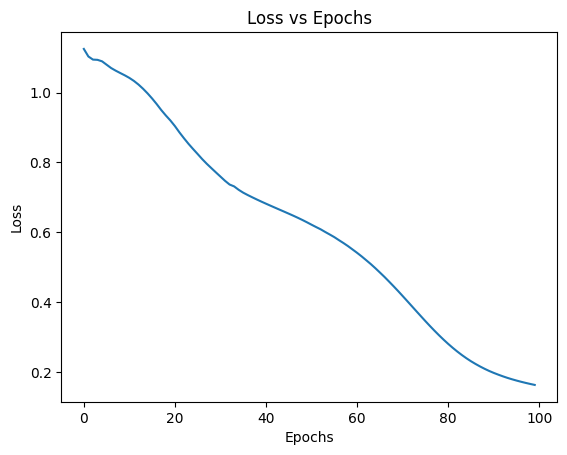

In [84]:
# Graph the loss values
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Visualizing Training Loss

Plotting the loss over epochs helps us see if the model is learning and if the loss is decreasing as expected.

In [85]:
# Evaluate the model on the test set (validate model on the test set)
with torch.no_grad():  # Disable gradient calculation for evaluation
    y_eval = model.forward(X_test)  # Forward pass on the test set
    loss_eval = criterion(y_eval, y_test)  # Calculate the loss on the test set
    print(f'Test Loss: {loss_eval.item():.4f}')  # Print the test loss

Test Loss: 0.1734


## Model Evaluation

We evaluate the model on the test set using loss and accuracy. For a deeper understanding, we can also use a confusion matrix and classification report.

In [87]:
correct = 0
with torch.no_grad():  # Disable gradient calculation for evaluation
    for i, data in enumerate(X_test):
        # Forward pass: Compute predicted y by passing x to the model
        y_val = model.forward(data)

        # Will tell us what type of flower class the model predicts
        print(f'{i+1}.) {str(y_val)} \t {str(y_test[i])} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i].item():
            correct += 1
print(f'Accuracy: {correct/len(X_test) * 100:.2f}%')  # Print the accuracy of the model

1.) tensor([-4.7079,  2.3740, -0.8144]) 	 tensor(1) 	 1
2.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
3.) tensor([-18.7165,  -2.6005,   7.9112]) 	 tensor(2) 	 2
4.) tensor([-5.0069,  2.1319, -0.5323]) 	 tensor(1) 	 1
5.) tensor([-5.1730,  2.6346, -0.8021]) 	 tensor(1) 	 1
6.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
7.) tensor([-2.3807,  2.1385, -1.5984]) 	 tensor(1) 	 1
8.) tensor([-9.9094,  0.6423,  2.3574]) 	 tensor(2) 	 2
9.) tensor([-7.4864,  1.0895,  1.1073]) 	 tensor(1) 	 2
10.) tensor([-2.7857,  2.4944, -1.6760]) 	 tensor(1) 	 1
11.) tensor([-8.5797,  0.9966,  1.6050]) 	 tensor(2) 	 2
12.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
13.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
14.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
15.) tensor([ 1.0010, -0.8339, -0.9507]) 	 tensor(0) 	 0
16.) tensor([-4.4661,  2.6437, -1.0741]) 	 tensor(1) 	 1
17.) tensor([-13.6314,  -1.1790,   4.9951]) 	 tensor(2) 	 2
18.) tensor([-2.8170,  2.5219, -1.

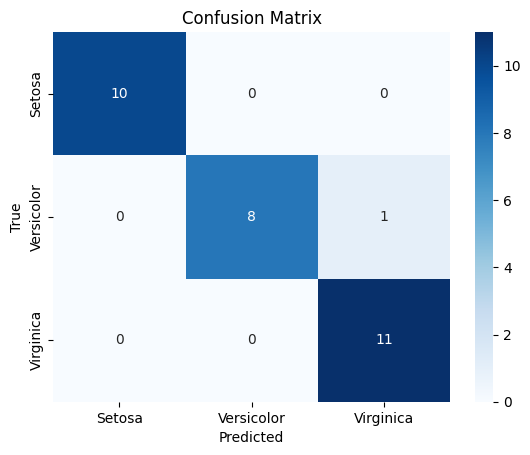

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.89      0.94         9
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [104]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for the test set
with torch.no_grad():
    y_pred_probs = model.forward(X_test)
    y_pred_labels = y_pred_probs.argmax(dim=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_labels, target_names=['Setosa', 'Versicolor', 'Virginica']))

In [93]:
new_iris = torch.tensor([[6.7, 3.0, 5.2, 2.3]])  # Example new iris flower data

## Making Predictions on New Data

You can use the trained model to predict the class of new iris flower measurements. Enter your own values to see the prediction.

In [95]:
with torch.no_grad():  # Disable gradient calculation for evaluation
    print(f'New Iris Flower Prediction: {model.forward(new_iris).argmax().item()}')  # Predict the class of the new iris flower
# The output will be 0, 1, or 2 corresponding to Setosa, Versicolor, or Virginica
# You can change the values in new_iris to test with different flower measurements

New Iris Flower Prediction: 2


In [98]:
## Save the NN model
import os
os.makedirs('models', exist_ok=True)  # Ensure 'models' directory exists
torch.save(model.state_dict(), 'models/iris_model.pth')  # Save the model's state
print("Model saved to models/iris_model.pth")  # Confirmation message

Model saved to models/iris_model.pth


## Saving and Loading the Model

You can save the trained model's weights to disk and load them later for inference or further training.

In [99]:
# Load the model
loaded_model = Model()  # Create a new instance of the model
loaded_model.load_state_dict(torch.load('models/iris_model.pth'))  # Load the saved state into the model

<All keys matched successfully>

In [100]:
# Make sure the loaded model works
loaded_model.eval()  # Set the model to evaluation mode

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=3, bias=True)
)

# Summary

- Built and trained a simple neural network for iris flower classification using PyTorch.
- Explored data preprocessing, model architecture, training, evaluation, and model persistence.
- Next steps: try tuning hyperparameters, adding regularization, or experimenting with different architectures!